In [108]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
from stats import median

csvpath = os.path.join("Data", "city_codes.csv")
csvpath = os.path.join("Data", "majors_dates.csv")
csvpath = os.path.join("Data", "rift_weath_sol_equ.csv")
csvpath = os.path.join("Data", "elevation.csv")

In [2]:
city_codes_csv = "Data/city_codes.csv"

In [3]:
city_codes_df = pd.read_csv(city_codes_csv)

In [4]:
major_dates_csv = "Data/majors_dates.csv"

In [5]:
major_dates_df = pd.read_csv(major_dates_csv)

In [6]:
major_dates_df

,major,city_code,13 majors,14 majors,15 majors,16 majors,17 majors,18 majors
0,Tokyo,TYO,2013/02/24,2014/02/23,2015/02/22,2016/02/28,2017/02/28,2018/02/25
1,Boston,BOS,2013/04/15,2014/04/21,2015/04/20,2016/04/18,2017/04/17,2018/04/16
2,London,GBR,2013/04/21,2014/04/13,2015/04/26,2016/04/24,2017/04/23,2018/04/22
3,Berlin,BER,2013/09/29,2014/09/28,2015/09/27,2016/09/25,2017/09/24,2018/09/16
4,Chicago,CHI,2013/10/13,2014/10/12,2015/10/11,2016/10/09,2017/10/08,2018/10/13
5,New York,NYC,2013/11/03,2014/11/02,2015/11/01,2016/11/06,2017/11/05,2018/11/04


In [19]:
city_13_list = []
feel_13_list = []


url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in major_dates_df.iterrows():
 
    params['q'] = row['major']
    params['date'] = row['13 majors']
    
    response = requests.get(url, params=params).json()
    
    city_13_list.append(row['major'])
    feel_13_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [21]:
city_14_list = []
feel_14_list = []


url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in major_dates_df.iterrows():
 
    params['q'] = row['major']
    params['date'] = row['14 majors']
    
    response = requests.get(url, params=params).json()
    
    city_14_list.append(row['major'])
    feel_14_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [22]:
city_15_list = []
feel_15_list = []


url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in major_dates_df.iterrows():
 
    params['q'] = row['major']
    params['date'] = row['15 majors']
    
    response = requests.get(url, params=params).json()
    
    city_15_list.append(row['major'])
    feel_15_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [23]:
city_16_list = []
feel_16_list = []


url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in major_dates_df.iterrows():
 
    params['q'] = row['major']
    params['date'] = row['16 majors']
    
    response = requests.get(url, params=params).json()

    city_16_list.append(row['major'])
    feel_16_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [24]:
city_17_list = []
feel_17_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in major_dates_df.iterrows():
 
    params['q'] = row['major']
    params['date'] = row['17 majors']
    
    response = requests.get(url, params=params).json()

    city_17_list.append(row['major'])
    feel_17_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [25]:
city_18_list = []
feel_18_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in major_dates_df.iterrows():
 
    params['q'] = row['major']
    params['date'] = row['18 majors']
    
    response = requests.get(url, params=params).json()

    city_18_list.append(row['major'])
    feel_18_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [35]:
majors_weather_dict = {
    "city": city_13_list,
    "2013": feel_13_list,
    "2014": feel_14_list,
    "2015": feel_15_list,
    "2016": feel_16_list,
    "2017": feel_17_list,
    "2018": feel_18_list,
}
majors_weather_df = pd.DataFrame(majors_weather_dict)
majors_weather_df.head()

,city,2013,2014,2015,2016,2017,2018
0,Tokyo,33,34,44,48,38,42
1,Boston,43,48,41,45,64,38
2,London,47,49,45,38,47,65
3,Berlin,45,59,55,60,59,65
4,Chicago,55,50,60,54,67,40


In [36]:
merge_weather_df = pd.merge(majors_weather_df, city_codes_df, on="city")
merge_weather_df

,city,2013,2014,2015,2016,2017,2018,city_code
0,Tokyo,33,34,44,48,38,42,TYO
1,Boston,43,48,41,45,64,38,BOS
2,London,47,49,45,38,47,65,GBR
3,Berlin,45,59,55,60,59,65,BER
4,Chicago,55,50,60,54,67,40,CHI
5,New York,40,33,55,47,57,52,NYC


In [37]:
merge_weather_df = merge_weather_df.set_index("city_code")
merge_weather_df

,city,2013,2014,2015,2016,2017,2018
city_code,,,,,,,
TYO,Tokyo,33,34,44,48,38,42
BOS,Boston,43,48,41,45,64,38
GBR,London,47,49,45,38,47,65
BER,Berlin,45,59,55,60,59,65
CHI,Chicago,55,50,60,54,67,40
NYC,New York,40,33,55,47,57,52


In [38]:
merge_weather_df = merge_weather_df.drop(columns="city")
merge_weather_df

,2013,2014,2015,2016,2017,2018
city_code,,,,,,
TYO,33,34,44,48,38,42
BOS,43,48,41,45,64,38
GBR,47,49,45,38,47,65
BER,45,59,55,60,59,65
CHI,55,50,60,54,67,40
NYC,40,33,55,47,57,52


In [39]:
merge_weather_df=merge_weather_df.astype(float)
merge_weather_df

,2013,2014,2015,2016,2017,2018
city_code,,,,,,
TYO,33.0,34.0,44.0,48.0,38.0,42.0
BOS,43.0,48.0,41.0,45.0,64.0,38.0
GBR,47.0,49.0,45.0,38.0,47.0,65.0
BER,45.0,59.0,55.0,60.0,59.0,65.0
CHI,55.0,50.0,60.0,54.0,67.0,40.0
NYC,40.0,33.0,55.0,47.0,57.0,52.0


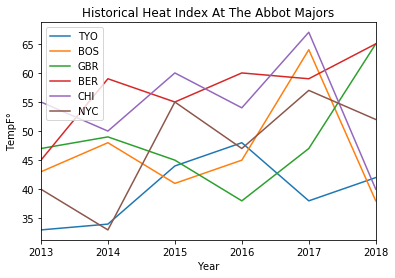

In [120]:
merge_weather_df.loc['TYO', "2013":"2018"].plot(label="TYO")
merge_weather_df.loc['BOS', "2013":"2018"].plot(label="BOS")
merge_weather_df.loc['GBR', "2013":"2018"].plot(label="GBR")
merge_weather_df.loc['BER', "2013":"2018"].plot(label="BER")
merge_weather_df.loc['CHI', "2013":"2018"].plot(label="CHI")
merge_weather_df.loc['NYC', "2013":"2018"].plot(label="NYC")

plt.legend(loc="best")
plt.title("Historical Heat Index At The Abbot Majors")
plt.xlabel("Year")
plt.ylabel("TempF°")
plt.savefig('majorheat.png')
plt.show()


Text(0, 0.5, 'TempF°')

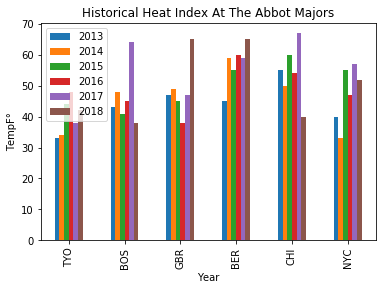

In [41]:
merge_weather_df.plot.bar()
plt.legend(loc="best")
plt.title("Historical Heat Index At The Abbot Majors")
plt.xlabel("Year")
plt.ylabel("TempF°")

In [42]:
rift_dates_csv = "Data/rift_weath_sol_equ.csv"
rift_dates_df = pd.read_csv(rift_dates_csv)
rift_dates_df

,city,sumsol_13,winsol_13,sprequ_13,fallequ_13,sumsol_14,winsol_14,sprequ_14,fallequ_14,sumsol_15,...,sprequ_16,fallequ_16,sumsol_17,winsol_17,sprequ_17,fallequ_17,sumsol_18,winsol_18,sprequ_18,fallequ_18
0,"Addis, Adeba",2013-06-21,2013-12-21,2013-03-20,2013-09-23,2014-06-21,2014-12-21,2014-03-13,2014-09-23,2015-06-21,...,2016-03-20,2016-09-23,2017-06-21,2017-12-21,2017-03-20,2017-09-23,2018-06-21,2018-12-21,2018-03-20,2018-09-23
1,"Nairobi, Kenya",2013-06-21,2013-12-21,2013-03-20,2013-09-23,2014-06-21,2014-12-21,2014-03-13,2014-09-23,2015-06-21,...,2016-03-20,2016-09-23,2017-06-21,12017-12-21,2017-03-20,2017-09-23,2018-06-21,2018-12-21,2018-03-20,2018-09-23


In [61]:
city_riftss13_list = []
feel_riftss13_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['sumsol_13']
    
    response = requests.get(url, params=params).json()
    
    city_riftss13_list.append(row['city'])
    feel_riftss13_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
   

In [62]:
city_riftws13_list = []
feel_riftws13_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['winsol_13']
    
    response = requests.get(url, params=params).json()
    
    city_riftws13_list.append(row['city'])
    feel_riftws13_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [63]:
city_riftse13_list = []
feel_riftse13_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['sprequ_13']
    
    response = requests.get(url, params=params).json()
    
    city_riftse13_list.append(row['city'])
    feel_riftse13_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [64]:
city_riftfe13_list = []
feel_riftfe13_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['fallequ_13']
    
    response = requests.get(url, params=params).json()
    
    city_riftfe13_list.append(row['city'])
    feel_riftfe13_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
   

In [65]:
city_riftss14_list = []
feel_riftss14_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['sumsol_14']
    
    response = requests.get(url, params=params).json()
    
    city_riftss14_list.append(row['city'])
    feel_riftss14_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
    print(city_riftss14_list)
    print(feel_riftss14_list)
   

['Addis, Adeba']
['71']
['Addis, Adeba', 'Nairobi, Kenya']
['71', '63']


In [66]:
city_riftws14_list = []
feel_riftws14_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['winsol_14']
    
    response = requests.get(url, params=params).json()
    
    city_riftws14_list.append(row['city'])
    feel_riftws14_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
    print(city_riftws14_list)
    print(feel_riftws14_list)
   

['Addis, Adeba']
['63']
['Addis, Adeba', 'Nairobi, Kenya']
['63', '66']


In [67]:
city_riftse14_list = []
feel_riftse14_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['sprequ_14']
    
    response = requests.get(url, params=params).json()
    
    city_riftse14_list.append(row['city'])
    feel_riftse14_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [68]:
city_riftfe14_list = []
feel_riftfe14_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['fallequ_14']
    
    response = requests.get(url, params=params).json()
    
    city_riftfe14_list.append(row['city'])
    feel_riftfe14_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
   

In [69]:
city_riftss15_list = []
feel_riftss15_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['sumsol_15']
    
    response = requests.get(url, params=params).json()
    
    city_riftss15_list.append(row['city'])
    feel_riftss15_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
    print(city_riftss15_list)
    print(feel_riftss15_list)

['Addis, Adeba']
['70']
['Addis, Adeba', 'Nairobi, Kenya']
['70', '65']


In [70]:
city_riftws15_list = []
feel_riftws15_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['winsol_15']
    
    response = requests.get(url, params=params).json()
    
    city_riftws15_list.append(row['city'])
    feel_riftws15_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
    print(city_riftws15_list)
    print(feel_riftws15_list)
   

['Addis, Adeba']
['59']
['Addis, Adeba', 'Nairobi, Kenya']
['59', '67']


In [72]:
city_riftse15_list = []
feel_riftse15_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['sprequ_15']
    
    response = requests.get(url, params=params).json()
    
    city_riftse15_list.append(row['city'])
    feel_riftse15_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [73]:
city_riftfe15_list = []
feel_riftfe15_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['fallequ_15']
    
    response = requests.get(url, params=params).json()
    
    city_riftfe15_list.append(row['city'])
    feel_riftfe15_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [74]:
city_riftss16_list = []
feel_riftss16_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['sumsol_16']
    
    response = requests.get(url, params=params).json()
    
    city_riftss16_list.append(row['city'])
    feel_riftss16_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
    print(city_riftss16_list)
    print(feel_riftss16_list)

['Addis, Adeba']
['68']
['Addis, Adeba', 'Nairobi, Kenya']
['68', '63']


In [75]:
city_riftws16_list = []
feel_riftws16_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['winsol_16']
    
    response = requests.get(url, params=params).json()
    
    city_riftws16_list.append(row['city'])
    feel_riftws16_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
    print(city_riftws16_list)
    print(feel_riftws16_list)
   

['Addis, Adeba']
['59']
['Addis, Adeba', 'Nairobi, Kenya']
['59', '66']


In [77]:
city_riftse16_list = []
feel_riftse16_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['sprequ_16']
    
    response = requests.get(url, params=params).json()
    
    city_riftse16_list.append(row['city'])
    feel_riftse16_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [78]:
city_riftfe16_list = []
feel_riftfe16_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['fallequ_16']
    
    response = requests.get(url, params=params).json()
    
    city_riftfe16_list.append(row['city'])
    feel_riftfe16_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [79]:
city_riftss17_list = []
feel_riftss17_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['sumsol_17']
    
    response = requests.get(url, params=params).json()
    
    city_riftss17_list.append(row['city'])
    feel_riftss17_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
    print(city_riftss17_list)
    print(feel_riftss17_list)

['Addis, Adeba']
['72']
['Addis, Adeba', 'Nairobi, Kenya']
['72', '65']


In [80]:
city_riftws17_list = []
feel_riftws17_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['winsol_17']
    
    response = requests.get(url, params=params).json()
    
    city_riftws17_list.append(row['city'])
    feel_riftws17_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
    print(city_riftws17_list)
    print(feel_riftws17_list)
   

['Addis, Adeba']
['55']
['Addis, Adeba', 'Nairobi, Kenya']
['55', '66']


In [81]:
city_riftse17_list = []
feel_riftse17_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['sprequ_17']
    
    response = requests.get(url, params=params).json()
    
    city_riftse17_list.append(row['city'])
    feel_riftse17_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [82]:
city_riftfe17_list = []
feel_riftfe17_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['fallequ_17']
    
    response = requests.get(url, params=params).json()
    
    city_riftfe17_list.append(row['city'])
    feel_riftfe17_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [83]:
city_riftss18_list = []
feel_riftss18_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['sumsol_18']
    
    response = requests.get(url, params=params).json()
    
    city_riftss18_list.append(row['city'])
    feel_riftss18_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
    print(city_riftss18_list)
    print(feel_riftss18_list)

['Addis, Adeba']
['71']
['Addis, Adeba', 'Nairobi, Kenya']
['71', '64']


In [84]:
city_riftws18_list = []
feel_riftws18_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['winsol_18']
    
    response = requests.get(url, params=params).json()
    
    city_riftws18_list.append(row['city'])
    feel_riftws18_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))
    print(city_riftws18_list)
    print(feel_riftws18_list)

['Addis, Adeba']
['58']
['Addis, Adeba', 'Nairobi, Kenya']
['58', '68']


In [86]:
city_riftse18_list = []
feel_riftse18_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['sprequ_18']
    
    response = requests.get(url, params=params).json()
    
    city_riftse18_list.append(row['city'])
    feel_riftse18_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [87]:
city_riftfe18_list = []
feel_riftfe18_list = []

url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
params = {
    "key": "bc1fb38cb0ec446b83221156192908",  
    "tp": 24,
    "format": "json",    
}

for index, row in rift_dates_df.iterrows():
 
    params['q'] = row['city']
    params['date'] = row['fallequ_18']
    
    response = requests.get(url, params=params).json()
    
    city_riftfe18_list.append(row['city'])
    feel_riftfe18_list.append((response['data']['weather'][0]['hourly'][0]['FeelsLikeF']))

In [89]:
rift_weather_dict = {
    "city": city_riftfe18_list,
    "2013_summer": feel_riftss13_list,
    "2013_winter": feel_riftws13_list,
    "2013_spring": feel_riftse13_list,
    "2013_fall": feel_riftfe13_list,
    "2014_summer": feel_riftss14_list,
    "2014_winter": feel_riftws14_list,
    "2014_spring": feel_riftse14_list,
    "2014_fall": feel_riftfe14_list,
    "2015_summer": feel_riftss15_list,
    "2015_winter": feel_riftws15_list,
    "2015_spring": feel_riftse15_list,
    "2015_fall": feel_riftfe15_list,
    "2016_summer": feel_riftss16_list,
    "2016_winter": feel_riftws16_list,
    "2016_spring": feel_riftse16_list,
    "2016_fall": feel_riftfe16_list,
    "2017_summer": feel_riftss17_list,
    "2017_winter": feel_riftws17_list,
    "2017_spring": feel_riftse17_list,
    "2017_fall": feel_riftfe17_list,
    "2018_summer": feel_riftss18_list,
    "2018_winter": feel_riftws18_list,
    "2018_spring": feel_riftse18_list,
    "2018_fall": feel_riftfe18_list,
}
rift_weather_df = pd.DataFrame(rift_weather_dict)
rift_weather_df.head()

,city,2013_summer,2013_winter,2013_spring,2013_fall,2014_summer,2014_winter,2014_spring,2014_fall,2015_summer,...,2016_spring,2016_fall,2017_summer,2017_winter,2017_spring,2017_fall,2018_summer,2018_winter,2018_spring,2018_fall
0,"Addis, Adeba",70,58,68,69,71,63,66,68,70,...,68,69,72,55,70,68,71,58,66,67
1,"Nairobi, Kenya",61,64,66,66,63,66,70,66,65,...,73,69,65,66,72,70,64,68,67,68


In [90]:
rift_weather_df = rift_weather_df.set_index("city")
rift_weather_df

,2013_summer,2013_winter,2013_spring,2013_fall,2014_summer,2014_winter,2014_spring,2014_fall,2015_summer,2015_winter,...,2016_spring,2016_fall,2017_summer,2017_winter,2017_spring,2017_fall,2018_summer,2018_winter,2018_spring,2018_fall
city,,,,,,,,,,,,,,,,,,,,,
"Addis, Adeba",70,58,68,69,71,63,66,68,70,59,...,68,69,72,55,70,68,71,58,66,67
"Nairobi, Kenya",61,64,66,66,63,66,70,66,65,67,...,73,69,65,66,72,70,64,68,67,68


In [91]:
rift_weather_df=rift_weather_df.astype(float)
rift_weather_df

,2013_summer,2013_winter,2013_spring,2013_fall,2014_summer,2014_winter,2014_spring,2014_fall,2015_summer,2015_winter,...,2016_spring,2016_fall,2017_summer,2017_winter,2017_spring,2017_fall,2018_summer,2018_winter,2018_spring,2018_fall
city,,,,,,,,,,,,,,,,,,,,,
"Addis, Adeba",70.0,58.0,68.0,69.0,71.0,63.0,66.0,68.0,70.0,59.0,...,68.0,69.0,72.0,55.0,70.0,68.0,71.0,58.0,66.0,67.0
"Nairobi, Kenya",61.0,64.0,66.0,66.0,63.0,66.0,70.0,66.0,65.0,67.0,...,73.0,69.0,65.0,66.0,72.0,70.0,64.0,68.0,67.0,68.0


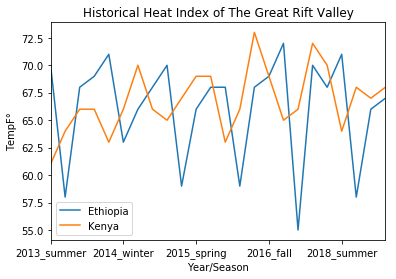

In [122]:
rift_weather_df.loc['Addis, Adeba', "2013_summer":"2018_fall"].plot(label="Ethiopia")
rift_weather_df.loc['Nairobi, Kenya', "2013_summer":"2018_fall"].plot(label="Kenya")

plt.legend(loc="best")
plt.title("Historical Heat Index of The Great Rift Valley")
plt.xlabel("Year/Season")
plt.ylabel("TempF°")
plt.savefig('riftheat.png')
plt.show()


Text(0, 0.5, 'TempF°')

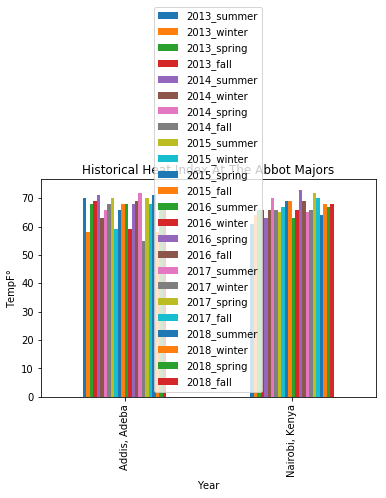

In [101]:
rift_weather_df.plot.bar()
plt.legend(loc="best")
plt.title("Historical Heat Index At The Abbot Majors")
plt.xlabel("Year")
plt.ylabel("TempF°")

In [112]:
elevation_csv = "Data/elevation.csv"

In [113]:
elevation_df = pd.read_csv(elevation_csv)

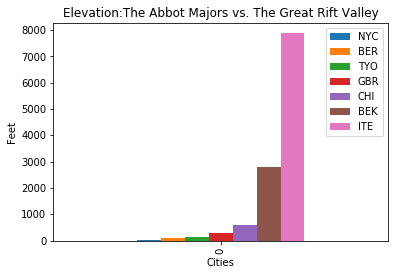

In [115]:

elevation_df.plot.bar()
plt.legend(loc="best")
plt.title("Elevation:The Abbot Majors vs. The Great Rift Valley")
plt.xlabel("Cities")
plt.ylabel("Feet")
plt.savefig('elevation.png')


In [ ]:
merge_weather_df = merge_weather_df.set_index("city_code")
merge_weather_df